In [ ]:
#Ejercicio numero 1 de Mínimos Cuadrados

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sym
import matplotlib.pyplot as plt
from scipy.optimize import minimize

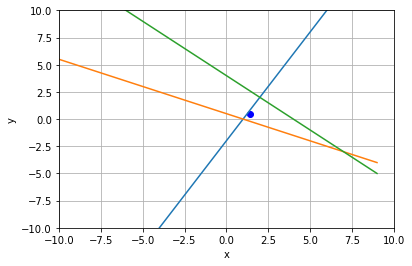

In [99]:
def funcion_1(x):
    return 2*x - 2

def funcion_2(x):
    return 1/2 - x/2

def funcion_3(x):
    return 4-x

#Parte a)

A = [[2,-1],[1,2],[1,1]]
b = [2,1,4]
A = np.array(A)
b = np.array(b)
AT = np.dot(A.T,A)
bT = np.dot(A.T,b)    
xsol = np.linalg.solve(AT,bT)
xsol

x = range(-10,10)
plt.grid()
plt.plot(x,[funcion_1(i) for i in x])
plt.plot(x,[funcion_2(i) for i in x])
plt.plot(x,[funcion_3(i) for i in x])
plt.scatter(xsol[0],xsol[1],color='b')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()



La distancia mínima es: 3.804475355280987


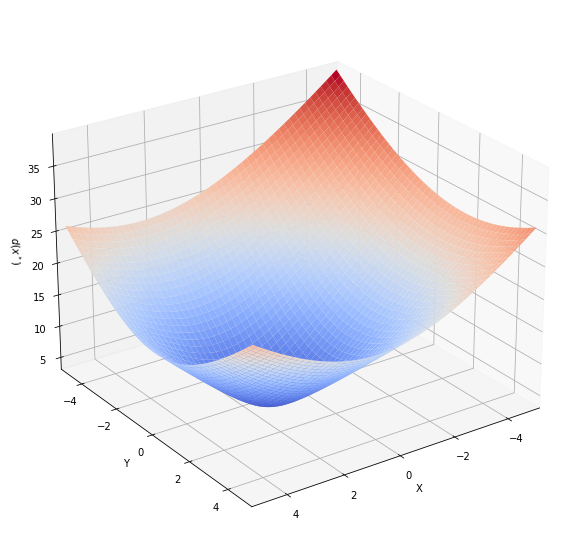

In [100]:
#Parte b)

x = np.linspace(-5,5,300)
y = np.linspace(-5,5,300)

X,Y = np.meshgrid(x,y)
N = X.shape[0]
min = 100
E_Z = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        
        x_i=X[i][j]
        y_i=Y[i][j]
        v = np.array([[x_i],[y_i]])
   
        Ax = np.dot(A,v)
        res = Ax - b
        nor = np.linalg.norm(res)
        E_Z[i][j]=nor
        if nor < min:
            min = nor

print("La distancia mínima es:",min)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection = "3d")

ax.set_xlim3d(-5,5)
ax.set_ylim3d(-5,5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('$d(x^*)$')
ax.view_init(25,55)
ax.plot_surface(X,Y,E_Z, cmap ="coolwarm")
plt.show()

In [101]:
#Ejercicio numero 7 de Mínimos Cuadrados

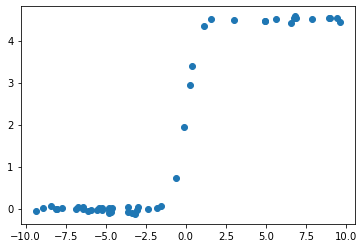

In [102]:

def sigmoid(x, theta0, theta1, theta2):
    return theta0 / (1 + np.exp(-theta1 * (x - theta2)))


url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv'
df = pd.read_csv(url)


x = df['x'].values
y = df['y'].values

plt.scatter(data["x"], data["y"], label="Datos")
plt.show()

In [103]:

def cost_function(theta, x, y):
    y_pred = sigmoid(x, theta[0], theta[1], theta[2])
    return np.sum((y - y_pred) ** 2)

In [104]:
def partial_derivative_chi2(theta, x, y):
    N = len(y)
    M = sigmoid(x, theta[0], theta[1], theta[2])
    dMdtheta = sigmoid_derivative(x, theta[0], theta[1], theta[2])
    residuals = y - M
    sigma = np.ones(N)
    partials = np.zeros(3)
    for i in range(3):
        partials[i] = -2 * np.sum(residuals / sigma ** 2 * dMdtheta[:, i])
    return partials

In [105]:

def gradient(theta, x, y):
    y_pred = sigmoid(x, theta[0], theta[1], theta[2])
    d_theta0 = 2 * np.sum((y_pred - y) / (1 + np.exp(-theta[1] * (x - theta[2]))))
    d_theta1 = 2 * np.sum((y_pred - y) * theta[0] * (x - theta[2]) * np.exp(-theta[1] * (x - theta[2])) / (1 + np.exp(-theta[1] * (x - theta[2]))) ** 2)
    d_theta2 = 2 * np.sum((y_pred - y) * theta[0] * theta[1] * np.exp(-theta[1] * (x - theta[2])) / (1 + np.exp(-theta[1] * (x - theta[2]))) ** 2)
    return np.array([d_theta0, d_theta1, d_theta2])

In [106]:

theta0 = np.array([1, 1, 1])
result = minimize(cost_function, theta0, args=(x, y), method='BFGS', jac=gradient, options={'maxiter': 10000, 'gtol': 0.01, 'disp': True})
theta = result.x

         Current function value: 119.700671
         Iterations: 2
         Function evaluations: 60
         Gradient evaluations: 48


In [107]:
x = data['x'].values
y = data['y'].values


gamma = 1e-3 # o 5e-4
theta0 = np.array([1, 1, 1])
epsilon = 0.01
max_iterations = 1e4


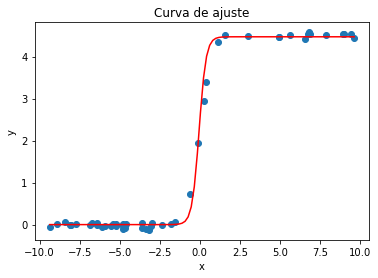

In [108]:
x_range = np.linspace(x.min(), x.max(), 100)


y_fit = []
for i in x_range:
    y_fit.append((theta[0]+2.5) / (theta[1] + sym.exp(-theta[2]*i)))

plt.scatter(x, y)
plt.plot(x_range, y_fit, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curva de ajuste')
plt.show()